In [8]:
from pandas import read_csv, DataFrame

In [57]:
# !pip install matplotlib

You should consider upgrading via the 'c:\users\emmett\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [9]:
dataset = read_csv(r"C:\Users\Emmett\fyp\scrapers\qualifax_scraper\data2020\results.csv", encoding='utf8', low_memory=False)

In [36]:
columns = ['course_content', 'careers_or_further_progression', 'attendance_options', 'course_name', 'location_(districts)']
df = DataFrame([], columns=columns)
for c in columns:
    df[c] = dataset[c].astype('str').replace('nan', '').replace('\n', '')
    df[c] = df[c].str.lower()

In [37]:
df.head(5)

,course_content,careers_or_further_progression,attendance_options,course_name,location_(districts)
0,what is... architecture - m arch?\nthe master ...,what are my career opportunities?\nthe qualifi...,"full time, daytime",architecture - bolton street,dublin city centre
1,what is... culinary innovation and food produc...,what are my career opportunities?\ngraduates o...,"full time, part time",culinary innovation and food product developme...,"dublin city centre, grangegorman"
2,what is... data science?\nthe postgraduate cer...,what are my career opportunities?\ndata scienc...,part time,data science - grangegorman,"dublin city centre, grangegorman"
3,this course provides an introduction to spirit...,,day release,spirituality awareness,belfast
4,course description\n\nis this course for me?\n...,,part time,21st century teaching and learning,dublin city centre


In [38]:
# df['fulldesc'] = ""
# for index,row in df.iterrows():
#     fulldesc = ""
#     for val in row.values:
#         if(str(val) != 'nan'):
#             fulldesc+=val+' '
#     df['fulldesc'].iloc[index] = fulldesc.lower().strip()

In [39]:
df['fulldesc'] = df['course_content'] + df['careers_or_further_progression'] + df['attendance_options'] + df['course_name'] + df['location_(districts)']

df['fulldesc'].head(10)

0    what is... architecture - m arch?\nthe master ...
1    what is... culinary innovation and food produc...
2    what is... data science?\nthe postgraduate cer...
3    this course provides an introduction to spirit...
4    course description\n\nis this course for me?\n...
5    course description \nthis course aims to provi...
6    this is a general course suited to those with ...
7    course description \ndevelop the knowledge, sk...
8    course description \nthis course aims to enabl...
9    this course is an introduction to 2d and 3d co...
Name: fulldesc, dtype: object

In [41]:
print(len(df))
cleaned_df = df[df['fulldesc']!='']
print(len(cleaned_df))

14839
14839


In [42]:
cleaned_df.head(5)

,course_content,careers_or_further_progression,attendance_options,course_name,location_(districts),fulldesc
0,what is... architecture - m arch?\nthe master ...,what are my career opportunities?\nthe qualifi...,"full time, daytime",architecture - bolton street,dublin city centre,what is... architecture - m arch?\nthe master ...
1,what is... culinary innovation and food produc...,what are my career opportunities?\ngraduates o...,"full time, part time",culinary innovation and food product developme...,"dublin city centre, grangegorman",what is... culinary innovation and food produc...
2,what is... data science?\nthe postgraduate cer...,what are my career opportunities?\ndata scienc...,part time,data science - grangegorman,"dublin city centre, grangegorman",what is... data science?\nthe postgraduate cer...
3,this course provides an introduction to spirit...,,day release,spirituality awareness,belfast,this course provides an introduction to spirit...
4,course description\n\nis this course for me?\n...,,part time,21st century teaching and learning,dublin city centre,course description\n\nis this course for me?\n...


In [43]:
# remove "'ll" from words like you'll, we'll, they'll
cleaned_df['fulldesc'] = cleaned_df['fulldesc'].str.replace("'ll", " ")

In [44]:
# remove punctuation
cleaned_df['fulldesc'].head(5)
cleaned_df['fulldesc'] = cleaned_df['fulldesc'].replace({"[^A-Za-z0-9]+": " "}, regex=True)
cleaned_df['fulldesc'] = cleaned_df['fulldesc'].str.strip()

In [45]:
cleaned_df['fulldesc'].head(5)

0    what is architecture m arch the master of arch...
1    what is culinary innovation and food product d...
2    what is data science the postgraduate certific...
3    this course provides an introduction to spirit...
4    course description is this course for me the c...
Name: fulldesc, dtype: object

In [46]:
# convert the textual data into vectors, only fulldesc
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# removes stop_words like if, the, then, will, common ones
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_df['fulldesc'])

AttributeError: head not found

In [51]:
# check for ideal number of clusters using elbow method
wcss = []

for k in range(1,16):
    print('cluster: ', k)
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=15)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

cluster:  1
cluster:  2
cluster:  3
cluster:  4
cluster:  5
cluster:  6
cluster:  7
cluster:  8
cluster:  9
cluster:  10
cluster:  11
cluster:  12
cluster:  13
cluster:  14
cluster:  15


In [58]:
import matplotlib.pyplot as plt

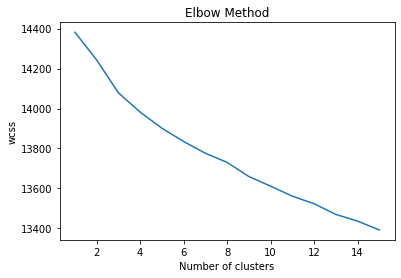

In [59]:
plt.plot(range(1,16),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()